<b><font size=20, color='#A020F0'>Violent Tornado Impacts</font></b>

#### <span style="color:green">Learning Goals</span>
F/EF4 tornadoes are often underestimated in terms of their potential for causing deaths, injuries, and damage when compared to the stigma associated with F/EF5 tornadoes as the "strongest" and most destructive. While F/EF5 tornadoes indeed represent the peak of intensity, F/EF4 tornadoes can produce catastrophic impacts that rival those of F/EF5s, often with only slight differences in wind speeds. This misperception can lead to reduced public awareness and preparedness for F/EF4 events, despite their immense destructive power. In the following analysis, we will examine strong tornadoes, specifically those classified as F/EF2 and F/EF3, and compare them to violent tornadoes, F/EF4 and F/EF5. Additionally, we will explore the dynamics and impacts of F/EF4 tornadoes relative to F/EF5s, aiming to highlight their significant role in severe weather patterns and the resulting consequences.

1. Become familiar with the kinetic energy of tornadoes.
2. Take a look at how many tornadoes, in the category of strong and violent tornadoes, have occurred since 1950. 1950 being the beginning of recorded history of tornadoes. 
3. Investigate how F/EF4 tornadoes compare to F/EF5 tornadoes. 

### Part 1. Kinetic Energy of Tornadoes

The F scale (Fujita Scale) and EF scale (Enhanced Fujita Scale) are both systems used to rate tornado intensity based on damage caused. However, the EF scale refines wind speed estimates by incorporating more detailed engineering assessments, making it more accurate. While both scales quantify tornado strength, they use different methodologies and thresholds for wind speeds.

To estimate the kinetic energy of a tornado, we assume an air density of `1 kg/m^3` and convert wind speeds from miles per hour (mph) to meters per second (m/s) (`1 mph = 0.447 m/s`). The kinetic energy (`KE`) of the moving air can then be calculated using the formula:

$$
KE = \frac{1}{2} m v^2
$$


where:

- `m` is the mass of the air (in kilograms),
- `v` is the wind speed (in meters per second).

By estimating the volume and mass of the air involved, we can approximate the total kinetic energy of the tornado.


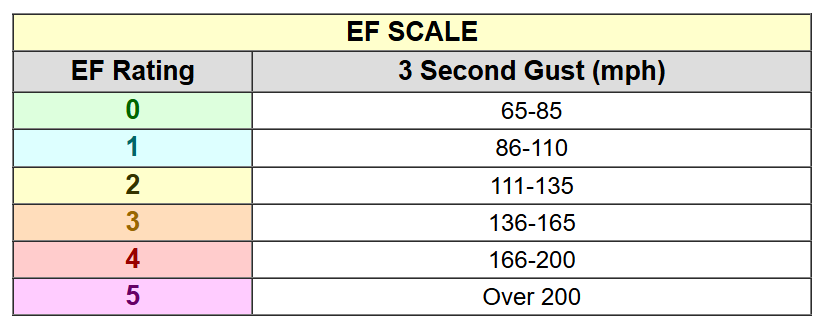

This is the scale currently in practice.

https://www.weather.gov/oun/efscale

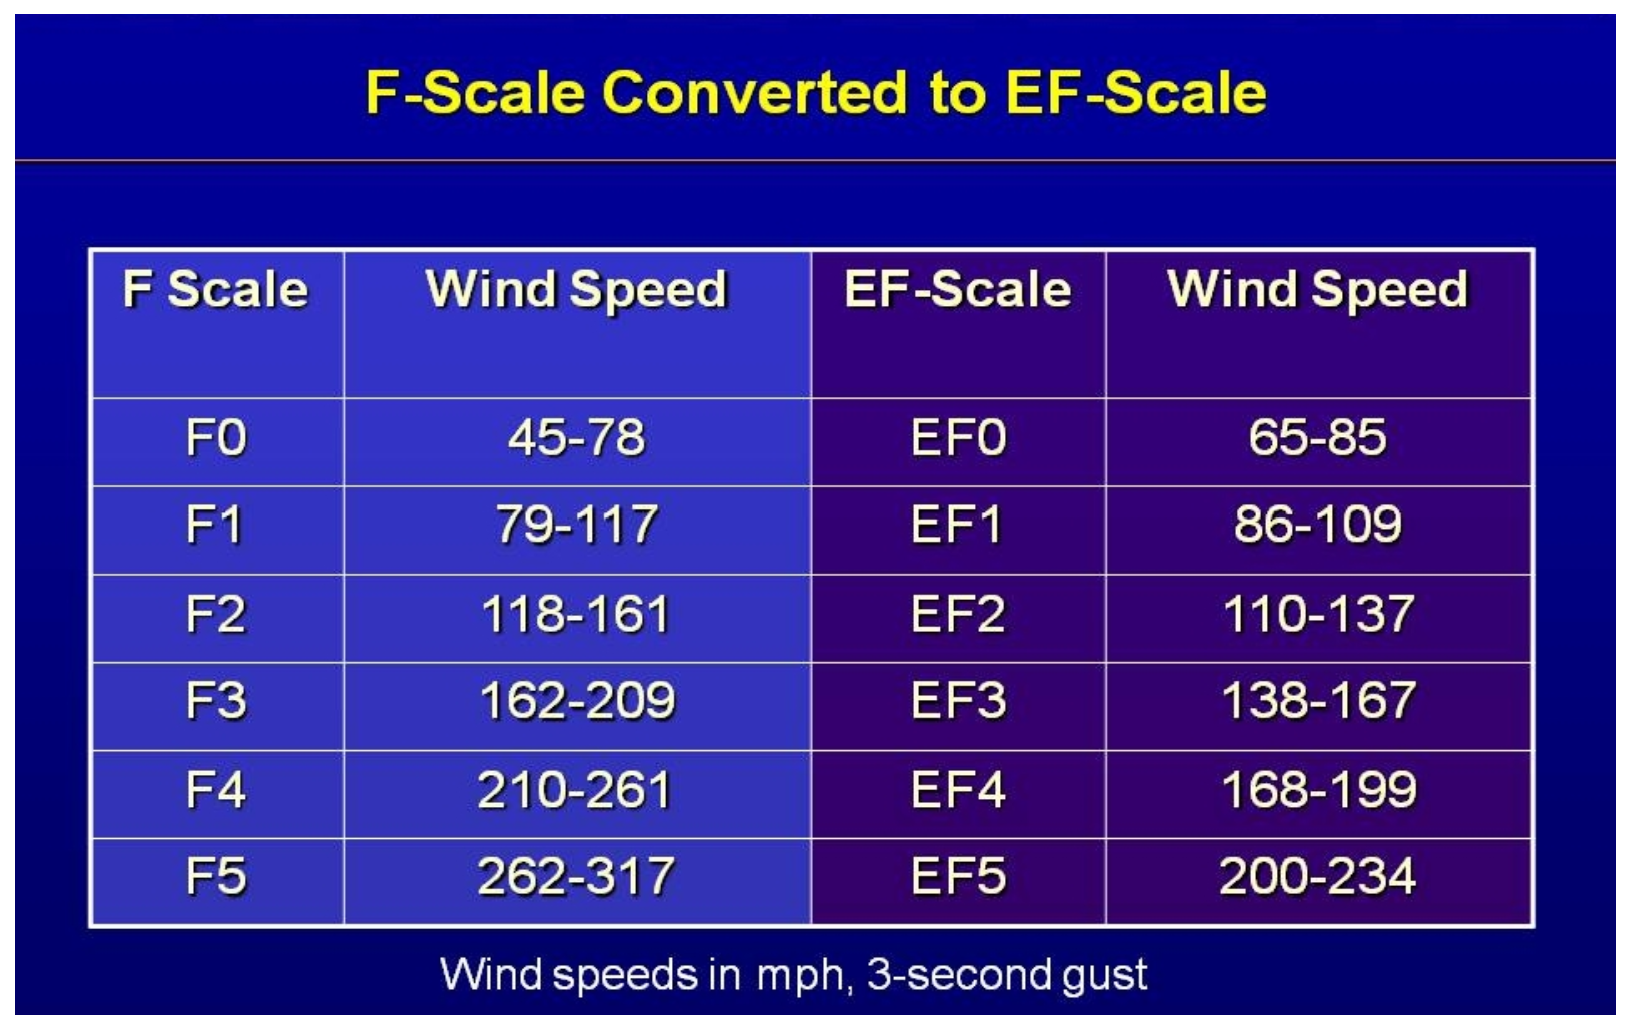

This scale shows how to convert between scales.

https://www.weather.gov/tae/tornadoclimatology

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

EF0: 721.94 J/m³
EF1: 1209.06 J/m³
EF2: 1821.09 J/m³
EF3: 2720.39 J/m³
EF4: 3996.90 J/m³
EF5: 5471.35 J/m³


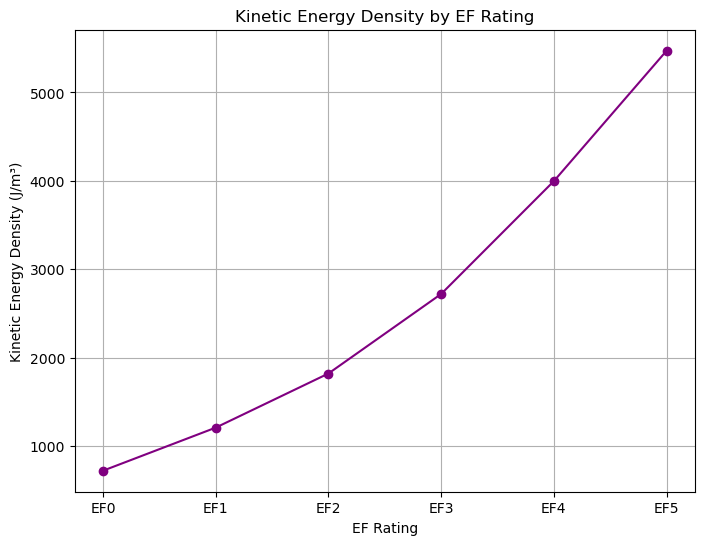

In [2]:
# Define the air density in kg/m^3
air_density = 1.000  # kg/m^3

# Conversion factor from mph to m/s
mph_to_mps = 0.44704

# EF scale wind speed ranges in mph
ef_scale = {
    'EF0': (65, 85),
    'EF1': (86, 110),
    'EF2': (111, 135),
    'EF3': (136, 165),
    'EF4': (166, 200),
    'EF5': (201, 234)  
}

# Calculate kinetic energy density for each EF category
ef_categories = []
ke_densities = []
for ef, (min_mph, max_mph) in ef_scale.items():
    max_mps = max_mph * mph_to_mps  # Convert max speed to m/s
    ke = 0.5 * air_density * max_mps**2  # Kinetic energy density in J/m^3
    ef_categories.append(ef)
    ke_densities.append(ke)

# Display the results
for ef, ke in zip(ef_categories, ke_densities):
    print(f"{ef}: {ke:.2f} J/m³")

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(ef_categories, ke_densities, marker='o', linestyle='-', color='purple')
plt.xlabel('EF Rating')
plt.ylabel('Kinetic Energy Density (J/m³)')
plt.title('Kinetic Energy Density by EF Rating')
plt.grid(True)
plt.show()


The plot above shows an exponential relationship between the kinetic energy of the tornado damage rating.

### Part 2. Tornado Totals since 1950

The data used for this analysis comes from the Storm Events Database, a comprehensive archive of severe weather events in the United States. Tornado data was specifically extracted for events rated F/EF2 and higher, focusing on stronger tornadoes with significant potential for damage. This dataset includes key information such as the tornado's rating, date, location, and associated damage in millions of dollars. By filtering for F/EF2 and stronger tornadoes, the dataset allows us to investigate trends in the total number of these events by damage rating for each year since 1950. This approach provides insight into the frequency and severity of strong and violent tornadoes over time, contributing to a better understanding of their impacts and potential patterns.

https://www.ncdc.noaa.gov/stormevents/

In [3]:
# Import only rows up to row 16063
data = pd.read_csv(
    '573dataform.csv',
    parse_dates=['BEGIN_DATE'],  # Parse BEGIN_DATE as datetime
    infer_datetime_format=True,  # Optimize parsing
    low_memory=False,  # Prevent DtypeWarning
)

print(data.head())
# Verify the result
print(data.tail())

                         Source.Name  EVENT_ID     CZ_NAME_STR BEGIN_LOCATION  \
0  storm_data_search_results (3).csv  10063615   ST. LOUIS CO.                  
1  storm_data_search_results (3).csv  10009710     MADISON CO.                  
2  storm_data_search_results (3).csv  10009711  MONTGOMERY CO.                  
3  storm_data_search_results (3).csv   9981922        POLK CO.                  
4  storm_data_search_results (3).csv  10063616        IRON CO.                  

  BEGIN_DATE  BEGIN_TIME EVENT_TYPE  MAGNITUDE TOR_F_SCALE  DEATHS_DIRECT  \
0 1950-01-03        1100    Tornado        0.0          F3              0   
1 1950-01-03        1110    Tornado        0.0          F3              0   
2 1950-01-03        1155    Tornado        0.0          F3              0   
3 1950-01-13         525    Tornado        0.0          F3              1   
4 1950-01-25        1930    Tornado        0.0          F2              0   

   ...  END_LOCATION   END_DATE  END_TIME BEGIN_LA

/tmp/ipykernel_2034/2275147343.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(


In [4]:
# Filter for F/EF2 and higher tornadoes
filtered_data = data[data['TOR_F_SCALE'].isin(['F2', 'F3', 'F4', 'F5', 'EF2', 'EF3', 'EF4', 'EF5'])]

# Check if the filtered data looks correct
print(filtered_data['TOR_F_SCALE'].value_counts())


TOR_F_SCALE
F2     9004
F3     2891
EF2    2291
F4      993
EF3     614
EF4     132
F5      124
EF5      14
Name: count, dtype: int64


Above we notice that the damage ratings are filtered into 8 categories. Although we get an understanding of how the 2 scales were used, we want to look at each category as a whole. So we will create mapping in order to combine the categories as F/EF2, F/EF3, F/EF4 and F/EF5.

In [5]:
# Create a mapping for F/EF categories with the desired names
scale_mapping = {
    'F2': 'F/EF2', 'EF2': 'F/EF2',
    'F3': 'F/EF3', 'EF3': 'F/EF3',
    'F4': 'F/EF4', 'EF4': 'F/EF4',
    'F5': 'F/EF5', 'EF5': 'F/EF5'
}

# Assign the mapped values to a new column using .loc to avoid the warning
filtered_data.loc[:, 'COMBINED_SCALE'] = filtered_data['TOR_F_SCALE'].map(scale_mapping)

# Verify the mapping
print(filtered_data['COMBINED_SCALE'].value_counts())

# Total number of tornadoes across all categories
total_tornadoes = len(filtered_data)

print(f"Total Tornadoes: {total_tornadoes}")

COMBINED_SCALE
F/EF2    11295
F/EF3     3505
F/EF4     1125
F/EF5      138
Name: count, dtype: int64
Total Tornadoes: 16063


Here we notice that we have the correct categories, however, the Storm Events Databas is exactly as it is called, showing events.
We want to look at the tornadoes more as a whole, instead we have events in which tornadoes could be counted more than once. 
We will use the haversine formula to try and narrow down the events into whole tornadoes. This may not be entirely accurate as we
can only play around with the threshold for distance and time. However, using the formula should provide results of whole tornadoes For each category of tornado, the distance and time thresholds have been adjusted accordingly.

Run the following cells to provide results for each category. The cell for F/EF3 will take about 7 minutes or so to generate. 

The cell for F/EF2 is adjusted slightly to avoid an hour or more in generating.

In [6]:
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# Haversine formula to calculate distance between two lat/long pairs
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [7]:
# Set thresholds for proximity
distance_threshold_km = 98  # Maximum distance in kilometers
time_threshold_hours = 2  # Maximum time difference in hours

# Step 1: Filter for F/EF5 tornadoes
f5_data = filtered_data[filtered_data['COMBINED_SCALE'] == 'F/EF5'].copy()

# Step 2: Create BEGIN_DATETIME column
f5_data['BEGIN_DATETIME'] = pd.to_datetime(
    f5_data['BEGIN_DATE'].astype(str) + ' ' + f5_data['BEGIN_TIME'].astype(str),
    errors='coerce'
)

# Step 3: Drop rows with invalid BEGIN_DATETIME
f5_data = f5_data.dropna(subset=['BEGIN_DATETIME'])

# Step 4: Sort the data by BEGIN_DATETIME
f5_data = f5_data.sort_values(by='BEGIN_DATETIME')

# Step 5: Deduplicate based on proximity
unique_tornadoes = []
used_indices = set()

for i, row1 in f5_data.iterrows():
    if i in used_indices:
        continue
    unique_tornadoes.append(i)
    for j, row2 in f5_data.iterrows():
        if j in used_indices or i == j:
            continue
        distance = haversine(row1['BEGIN_LAT'], row1['BEGIN_LON'], row2['BEGIN_LAT'], row2['BEGIN_LON'])
        time_diff = abs((row1['BEGIN_DATETIME'] - row2['BEGIN_DATETIME']).total_seconds()) / 3600
        if distance < distance_threshold_km and time_diff < time_threshold_hours:
            used_indices.add(j)

# Step 6: Count unique tornadoes
total_unique_f5_tornadoes = len(unique_tornadoes)
print(f"Total unique F/EF5 tornadoes after proximity filtering: {total_unique_f5_tornadoes}")

# Step 7: Extract data for unique tornadoes
unique_f5_data = f5_data.loc[unique_tornadoes].copy()

# Verify the count with the extracted data
print(f"Rows in unique_f5_data: {len(unique_f5_data)}")
print(f"Expected unique tornadoes: {total_unique_f5_tornadoes}")

# Step 8: Calculate aggregate statistics
total_deaths = unique_f5_data['DEATHS_DIRECT'].sum()
total_injuries = unique_f5_data['INJURIES_DIRECT'].sum()
total_damages = unique_f5_data['DAMAGE_PROPERTY_NUM'].sum()

print(f"Aggregate statistics for F/EF5 tornadoes:")
print(f"  Total Deaths: {total_deaths}")
print(f"  Total Injuries: {total_injuries}")
print(f"  Total Damages: ${total_damages / 1e6:.2f} million")



Total unique F/EF5 tornadoes after proximity filtering: 59
Rows in unique_f5_data: 59
Expected unique tornadoes: 59
Aggregate statistics for F/EF5 tornadoes:
  Total Deaths: 821
  Total Injuries: 7655
  Total Damages: $7338.08 million


In [8]:
# Parameters for F/EF4
distance_threshold_km = 73.3  # Maximum distance in kilometers
time_threshold_hours = 2  # Maximum time difference in hours

# Step 1: Filter for F/EF4 tornadoes
f4_data = filtered_data[filtered_data['COMBINED_SCALE'] == 'F/EF4'].copy()

# Step 2: Create BEGIN_DATETIME column
f4_data['BEGIN_DATETIME'] = pd.to_datetime(
    f4_data['BEGIN_DATE'].astype(str) + ' ' + f4_data['BEGIN_TIME'].astype(str),
    errors='coerce'
)

# Step 3: Drop rows with invalid BEGIN_DATETIME
f4_data = f4_data.dropna(subset=['BEGIN_DATETIME'])

# Step 4: Sort the data by BEGIN_DATETIME
f4_data = f4_data.sort_values(by='BEGIN_DATETIME')

# Step 5: Deduplicate based on proximity
unique_tornadoes = []
used_indices = set()

for i, row1 in f4_data.iterrows():
    if i in used_indices:
        continue
    unique_tornadoes.append(i)
    for j, row2 in f4_data.iterrows():
        if j in used_indices or i == j:
            continue
        distance = haversine(row1['BEGIN_LAT'], row1['BEGIN_LON'], row2['BEGIN_LAT'], row2['BEGIN_LON'])
        time_diff = abs((row1['BEGIN_DATETIME'] - row2['BEGIN_DATETIME']).total_seconds()) / 3600
        if distance < distance_threshold_km and time_diff < time_threshold_hours:
            used_indices.add(j)

# Step 6: Extract unique tornado data
unique_f4_data = f4_data.loc[unique_tornadoes].copy()

# Step 7: Count unique tornadoes
total_unique_f4_tornadoes = len(unique_f4_data)

# Step 8: Summarize impacts (deaths, injuries, damages)
total_f4_deaths = unique_f4_data['DEATHS_DIRECT'].sum()
total_f4_injuries = unique_f4_data['INJURIES_DIRECT'].sum()
total_f4_damages = unique_f4_data['DAMAGE_PROPERTY_NUM'].sum()  # Assuming damages are numeric
total_f4_damages_millions = total_f4_damages / 1e6  # Convert to millions for readability

# Display Results
print(f"Total unique F/EF4 tornadoes after proximity filtering: {total_unique_f4_tornadoes}")
print(f"Total deaths from F/EF4 tornadoes: {total_f4_deaths}")
print(f"Total injuries from F/EF4 tornadoes: {total_f4_injuries}")
print(f"Total damages (in millions) from F/EF4 tornadoes: ${total_f4_damages_millions:.2f}")



Total unique F/EF4 tornadoes after proximity filtering: 586
Total deaths from F/EF4 tornadoes: 1420
Total injuries from F/EF4 tornadoes: 20024
Total damages (in millions) from F/EF4 tornadoes: $11941.42


In [9]:
# Parameters for F/EF3
distance_threshold_km = 46.95  # Maximum distance in kilometers
time_threshold_hours = 1  # Maximum time difference in hours

# Step 1: Filter for F/EF3 tornadoes
f3_data = filtered_data[filtered_data['COMBINED_SCALE'] == 'F/EF3'].copy()

# Step 2: Create BEGIN_DATETIME column
f3_data['BEGIN_DATETIME'] = pd.to_datetime(
    f3_data['BEGIN_DATE'].astype(str) + ' ' + f3_data['BEGIN_TIME'].astype(str),
    errors='coerce'
)

# Step 3: Drop rows with invalid BEGIN_DATETIME
f3_data = f3_data.dropna(subset=['BEGIN_DATETIME'])

# Step 4: Sort the data by BEGIN_DATETIME
f3_data = f3_data.sort_values(by='BEGIN_DATETIME')

# Step 5: Deduplicate based on proximity
unique_tornadoes = []
used_indices = set()

for i, row1 in f3_data.iterrows():
    if i in used_indices:
        continue
    unique_tornadoes.append(i)
    for j, row2 in f3_data.iterrows():
        if j in used_indices or i == j:
            continue
        distance = haversine(row1['BEGIN_LAT'], row1['BEGIN_LON'], row2['BEGIN_LAT'], row2['BEGIN_LON'])
        time_diff = abs((row1['BEGIN_DATETIME'] - row2['BEGIN_DATETIME']).total_seconds()) / 3600
        if distance < distance_threshold_km and time_diff < time_threshold_hours:
            used_indices.add(j)

# Step 6: Extract unique tornado data
unique_f3_data = f3_data.loc[unique_tornadoes].copy()

# Step 7: Count unique tornadoes
total_unique_f3_tornadoes = len(unique_f3_data)

# Step 8: Summarize impacts (deaths, injuries, damages)
total_f3_deaths = unique_f3_data['DEATHS_DIRECT'].sum()
total_f3_injuries = unique_f3_data['INJURIES_DIRECT'].sum()
total_f3_damages = unique_f3_data['DAMAGE_PROPERTY_NUM'].sum()  # Assuming damages are numeric
total_f3_damages_millions = total_f3_damages / 1e6  # Convert to millions for readability

# Display Results
print(f"Total unique F/EF3 tornadoes after proximity filtering: {total_unique_f3_tornadoes}")
print(f"Total deaths from F/EF3 tornadoes: {total_f3_deaths}")
print(f"Total injuries from F/EF3 tornadoes: {total_f3_injuries}")
print(f"Total damages (in millions) from F/EF3 tornadoes: ${total_f3_damages_millions:.2f}")



Total unique F/EF3 tornadoes after proximity filtering: 2570
Total deaths from F/EF3 tornadoes: 1050
Total injuries from F/EF3 tornadoes: 19052
Total damages (in millions) from F/EF3 tornadoes: $16970.25


In [10]:
# Define clustering intervals for lat/lon and time rounding
lat_lon_interval = 0.758  # Cluster in ~5.5 km intervals
time_rounding = 'h'         # Round time to the nearest hour

# Step 1: Filter for F/EF2 tornadoes
f2_data = filtered_data[filtered_data['COMBINED_SCALE'] == 'F/EF2'].copy()

# Step 2: Create BEGIN_DATETIME column
f2_data['BEGIN_DATETIME'] = pd.to_datetime(
    f2_data['BEGIN_DATE'].astype(str) + ' ' + f2_data['BEGIN_TIME'].astype(str),
    errors='coerce'
)

# Step 3: Apply modular arithmetic for lat/lon clustering
f2_data['BEGIN_LAT_CLUSTER'] = (f2_data['BEGIN_LAT'] // lat_lon_interval) * lat_lon_interval
f2_data['BEGIN_LON_CLUSTER'] = (f2_data['BEGIN_LON'] // lat_lon_interval) * lat_lon_interval

# Step 4: Apply time rounding
f2_data['BEGIN_DATETIME_ROUND'] = f2_data['BEGIN_DATETIME'].dt.round(time_rounding)

# Step 5: Group by clustered lat/lon and rounded datetime
grouped = f2_data.groupby(['BEGIN_LAT_CLUSTER', 'BEGIN_LON_CLUSTER', 'BEGIN_DATETIME_ROUND'])

# Step 6: Extract first row from each cluster (deduplication)
unique_f2_data = grouped.apply(lambda x: x.iloc[0]).reset_index(drop=True)

# Summarize impact
total_unique_f2_tornadoes = len(unique_f2_data)
total_deaths = unique_f2_data['DEATHS_DIRECT'].sum()
total_injuries = unique_f2_data['INJURIES_DIRECT'].sum()
total_damages = unique_f2_data['DAMAGE_PROPERTY_NUM'].sum()
total_damages_millions = total_damages / 1e6

# Display results
print(f"Total unique F/EF2 tornadoes after clustering: {total_unique_f2_tornadoes}")
print(f"Total deaths from F/EF2 tornadoes: {total_deaths}")
print(f"Total injuries from F/EF2 tornadoes: {total_injuries}")
print(f"Total damages (in millions) from F/EF2 tornadoes: ${total_damages_millions:.2f}")


Total unique F/EF2 tornadoes after clustering: 9722
Total deaths from F/EF2 tornadoes: 583
Total injuries from F/EF2 tornadoes: 13815
Total damages (in millions) from F/EF2 tornadoes: $11580.14


/tmp/ipykernel_2034/1837182574.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_f2_data = grouped.apply(lambda x: x.iloc[0]).reset_index(drop=True)


Tornado Counts by Type and Year (including totals):
      F/EF5  F/EF4  F/EF3  F/EF2  Total
YEAR                                   
1950    0.0    8.0     25     68  101.0
1951    0.0    6.0     22     79  107.0
1952    0.0   15.0     32     75  122.0
1953    5.0   22.0     45    147  219.0
1954    0.0    7.0     43    200  250.0
...     ...    ...    ...    ...    ...
2019    0.0    3.0     34    116  153.0
2020    0.0    6.0     15     88  109.0
2021    0.0    4.0     25    100  129.0
2022    0.0    4.0     19    123  146.0
2023    0.0    2.0     32    139  173.0

[74 rows x 5 columns]


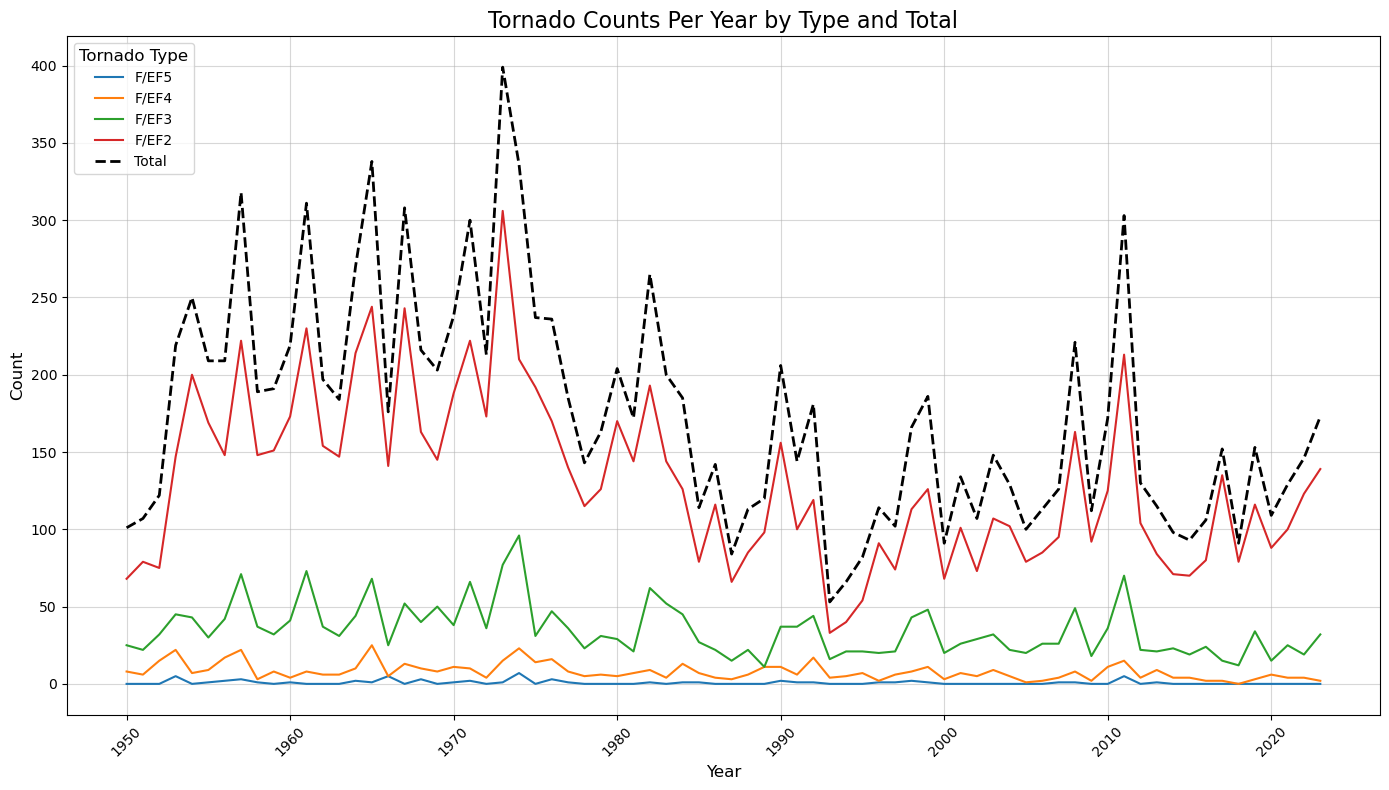

In [11]:
# Extract years and counts for each tornado type
tornado_counts_by_year = {}

for category, data in {
    "F/EF5": unique_f5_data,
    "F/EF4": unique_f4_data,
    "F/EF3": unique_f3_data,
    "F/EF2": unique_f2_data,
}.items():
    # Ensure correct unique data is used
    data["YEAR"] = data["BEGIN_DATETIME"].dt.year
    # Count occurrences per year
    counts = data["YEAR"].value_counts().sort_index()
    tornado_counts_by_year[category] = counts

# Create a DataFrame from the counts dictionary
counts_df = pd.DataFrame(tornado_counts_by_year).fillna(0)

# Add a column for total tornado counts across all types
counts_df["Total"] = counts_df.sum(axis=1)

# Display total counts for verification
print("Tornado Counts by Type and Year (including totals):")
print(counts_df)

# Plot the tornado counts by type and total
plt.figure(figsize=(14, 8))

# Plot each tornado type
for column in counts_df.columns[:-1]:  # Exclude "Total" column for individual lines
    plt.plot(counts_df.index, counts_df[column], label=column)

# Plot the total tornado counts
plt.plot(
    counts_df.index,
    counts_df["Total"],
    label="Total",
    color="black",
    linewidth=2,
    linestyle="--",
)

# Add labels, legend, and grid
plt.title("Tornado Counts Per Year by Type and Total", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(range(counts_df.index.min(), counts_df.index.max() + 1, 10), rotation=45)
plt.legend(title="Tornado Type", fontsize=10, title_fontsize=12, loc="upper left")
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


12937


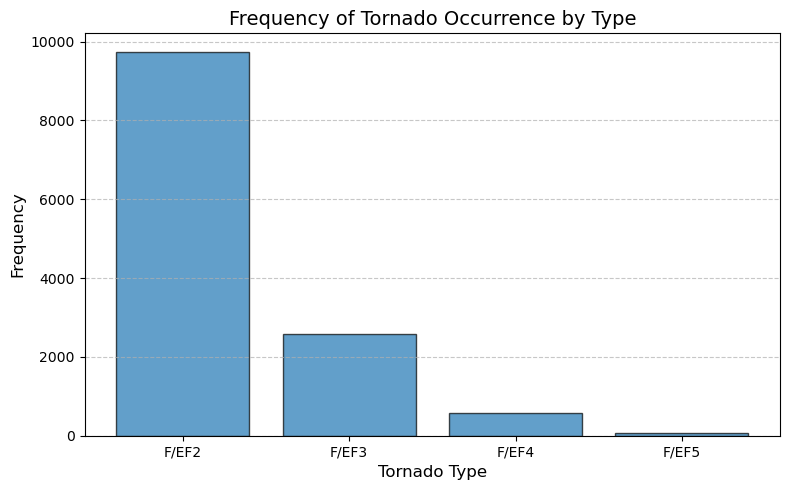

F/EF2: 9722 (75.15%)
F/EF3: 2570 (19.87%)
F/EF4: 586 (4.53%)
F/EF5: 59 (0.46%)


In [12]:
# Calculate the total tornado count using the already defined variables
freq_counts = (
    total_unique_f5_tornadoes +
    total_unique_f4_tornadoes +
    total_unique_f3_tornadoes +
    total_unique_f2_tornadoes
)

print(freq_counts)

# Tornado types
tornado_types = ['F/EF2', 'F/EF3', 'F/EF4', 'F/EF5']
tornado_counts = [
    total_unique_f2_tornadoes,
    total_unique_f3_tornadoes,
    total_unique_f4_tornadoes,
    total_unique_f5_tornadoes
]

# Plotting the frequency of each tornado type
plt.figure(figsize=(8, 5))
plt.bar(tornado_types, tornado_counts, edgecolor='black', alpha=0.7)
plt.title('Frequency of Tornado Occurrence by Type', fontsize=14)
plt.xlabel('Tornado Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# Calculate the percentage frequency for each tornado type
total_tornadoes = sum(tornado_counts)
tornado_percentages = [(count / total_tornadoes) * 100 for count in tornado_counts]

# Print the tornado types, counts, and their percentages
for tornado_type, count, percentage in zip(tornado_types, tornado_counts, tornado_percentages):
    print(f"{tornado_type}: {count} ({percentage:.2f}%)")


The above plots are interesting as I notice that during spikes of years with higher tornado totals, there is a higher probability of 
violent tornadoes also occurring. We also notice that F/EF2s are more frequent than the others with strong tornadoes more frequent than violent tornadoes. 

Below:
We will investigate deaths, injuries and damages per category.

In [13]:
# Summarize total deaths, injuries, and damages for each category
impact_summary = {
    'F/EF2': {
        'Total Deaths': unique_f2_data['DEATHS_DIRECT'].sum(),
        'Total Injuries': unique_f2_data['INJURIES_DIRECT'].sum(),
        'Total Damages (Millions)': unique_f2_data['DAMAGE_PROPERTY_NUM'].sum() / 1e6
    },
    'F/EF3': {
        'Total Deaths': unique_f3_data['DEATHS_DIRECT'].sum(),
        'Total Injuries': unique_f3_data['INJURIES_DIRECT'].sum(),
        'Total Damages (Millions)': unique_f3_data['DAMAGE_PROPERTY_NUM'].sum() / 1e6
    },
    'F/EF4': {
        'Total Deaths': unique_f4_data['DEATHS_DIRECT'].sum(),
        'Total Injuries': unique_f4_data['INJURIES_DIRECT'].sum(),
        'Total Damages (Millions)': unique_f4_data['DAMAGE_PROPERTY_NUM'].sum() / 1e6
    },
    'F/EF5': {
        'Total Deaths': unique_f5_data['DEATHS_DIRECT'].sum(),
        'Total Injuries': unique_f5_data['INJURIES_DIRECT'].sum(),
        'Total Damages (Millions)': unique_f5_data['DAMAGE_PROPERTY_NUM'].sum() / 1e6
    }
}

# Convert the summary dictionary to a DataFrame
impact_summary_df = pd.DataFrame.from_dict(impact_summary, orient='index')


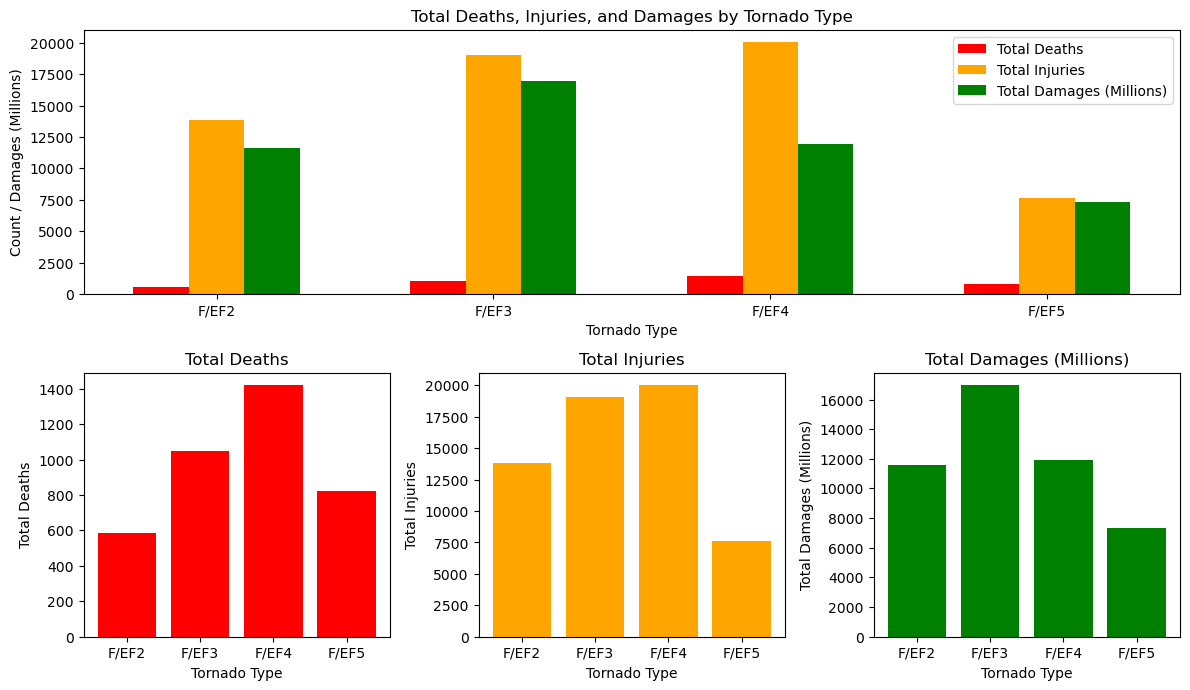

In [14]:
# Define the metrics to plot
metrics = ['Total Deaths', 'Total Injuries', 'Total Damages (Millions)']
colors = ['red', 'orange', 'green']

# Set the positions and width for the bars
x = np.arange(len(impact_summary_df.index))  # the label locations
width = 0.2  # the width of the bars

# Create the figure with GridSpec
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(3, 3, figure=fig)

# Main grouped bar chart spanning the top row
ax_main = fig.add_subplot(gs[0, :])
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax_main.bar(x + i * width, impact_summary_df[metric], width, label=metric, color=color)

# Customize the main plot
ax_main.set_xlabel('Tornado Type')
ax_main.set_ylabel('Count / Damages (Millions)')
ax_main.set_title('Total Deaths, Injuries, and Damages by Tornado Type')
ax_main.set_xticks(x + width)
ax_main.set_xticklabels(impact_summary_df.index)
ax_main.legend()

# Individual bar charts for each metric in the bottom row
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax = fig.add_subplot(gs[1, i])
    ax.bar(impact_summary_df.index, impact_summary_df[metric], color=color)
    ax.set_title(metric)
    ax.set_xlabel('Tornado Type')
    ax.set_ylabel(metric)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


As we can see with the above plots, F/EF4s carry the highest amount for deaths and injuries in total. I found F/EF3s surprising as 
they are higher in every category as compared to F/EF5s and are very similar to F/EF4s in injuries. I was also intrigued by F/EF3s and they 
are highest in total damages. However, this can be expected as storng tornadoes are much for frequent than violent tornadoes, even though 
this also highlights how F/EF3 tornadoes are a force to be reckoned with (perhaps quite literally).


### Part 3. Comparing Violent Tornadoes, F/EF4, to Violent Tornadoes, F/EF5

One thing to consider is that F/EF4s also occure more frequently as compared to F/EF5s. Below we will look at the averages of both to gain
an understanding of the impact each category carries. 

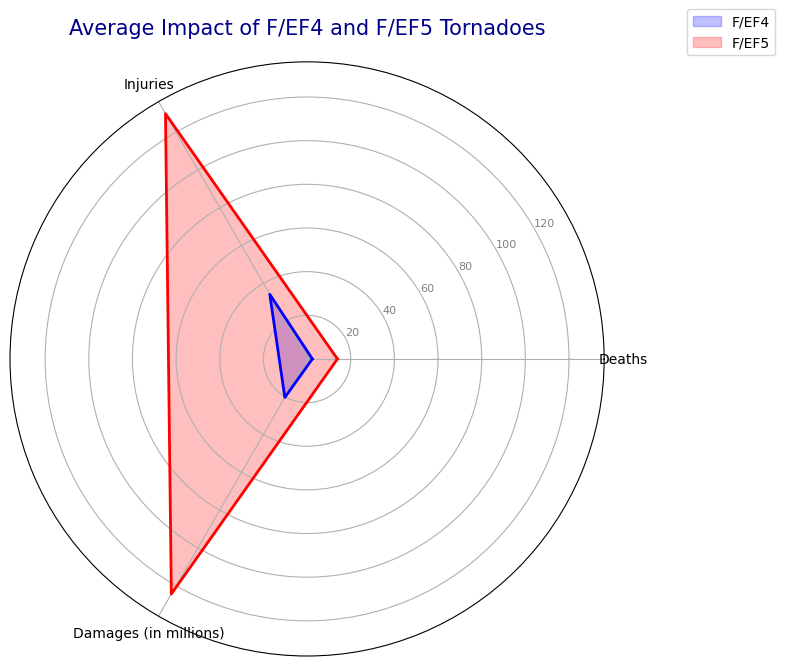

In [15]:
# Calculate average impacts for F/EF4 tornadoes
f4_avg_deaths = unique_f4_data['DEATHS_DIRECT'].mean()
f4_avg_injuries = unique_f4_data['INJURIES_DIRECT'].mean()
f4_avg_damages = unique_f4_data['DAMAGE_PROPERTY_NUM'].mean() / 1e6  # Convert to millions

# Calculate average impacts for F/EF5 tornadoes
f5_avg_deaths = unique_f5_data['DEATHS_DIRECT'].mean()
f5_avg_injuries = unique_f5_data['INJURIES_DIRECT'].mean()
f5_avg_damages = unique_f5_data['DAMAGE_PROPERTY_NUM'].mean() / 1e6  # Convert to millions

# Categories for the radar chart
categories = ['Deaths', 'Injuries', 'Damages (in millions)']
num_vars = len(categories)

# Create angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Data for plotting
f4_values = [f4_avg_deaths, f4_avg_injuries, f4_avg_damages]
f5_values = [f5_avg_deaths, f5_avg_injuries, f5_avg_damages]
f4_values += f4_values[:1]
f5_values += f5_values[:1]

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the F/EF4 data
ax.fill(angles, f4_values, color='blue', alpha=0.25, label='F/EF4')
ax.plot(angles, f4_values, color='blue', linewidth=2)

# Plot the F/EF5 data
ax.fill(angles, f5_values, color='red', alpha=0.25, label='F/EF5')
ax.plot(angles, f5_values, color='red', linewidth=2)

# Add category labels to the axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add labels for the radial axis
ax.set_rlabel_position(30)
ax.yaxis.set_tick_params(colors="grey", labelsize=8)
ax.set_title('Average Impact of F/EF4 and F/EF5 Tornadoes', size=15, color='darkblue', pad=20)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Display the radar chart
plt.tight_layout()
plt.show()


By using the radar plot above, I found that comparing the violent tornadoes is visually intriguing. This shows how much more of an 
impact a F/EF5 tornado is compared to an F/EF4 in general.

### A Different Perspective

So at the very beginning we looked at the Kinetic Energy per tornado damage category. What if we looked at the Kinetic Energy of individual
tornadoes? By utilizing the Storm Events Database along with quick Google searches of individual tornado wind speeds, we can investigate
which tornadoes may actually be the most powerful. Once again we will use the Kinetic Energy equation but with a twist. By adding a tornadoes
volume we can look at specific tornadoes and their strength in terms of Joules. To get the volume of a tornado, we take its length, width and
height. The length and width are provided in the data, and we will use a general height of a tornado. The height can vary from 500-1500 meters, 
so we will use a standard height of 1000 meters. We will be looking at 14 different tornadoes, 7 F/EF4s and 7 F/EF5s with a different dataset 
but set up similarly to the previous .csv. 

### Kinetic Energy Equation with Tornado Volume

1. **Standard Kinetic Energy**:
   $$
   KE = \frac{1}{2} m v^2
   $$

2. **Mass Calculation**:
   $$
   m = \rho \cdot V
   $$
   Where:
   - $\rho$ : Density of air $kg/m^3,$
   - V : Tornado volume $m^3.$

3. **Volume of the Tornado**:
   $$
   V = \text{Length} \times \text{Width} \times \text{Height}
   $$
   Where:
   - Length: Tornado's length (meters),
   - Width: Tornado's width (meters),
   - Height: Tornado's average height (meters).

4. **Final Kinetic Energy Expression**:
   $$
   KE = \frac{1}{2} \rho \cdot (\text{Length} \times \text{Width} \times \text{Height}) \cdot v^2
   $$
   Or equivalently:
   $$
   KE = \frac{1}{2} \rho \cdot \text{V} \cdot v^2
   $$


In [16]:
data = pd.read_csv('violenttorke.csv')

In [17]:
print(data.head())
# Verify the result
print(data.tail())

   EVENT_ID      CZ_NAME_STR    TOR_NAME BEGIN_LOCATION BEGIN_DATE  \
0   1170280        ADAIR CO.  GREENFIELD           FISK  5/21/2024   
1   5598913   WILLIAMSON CO.     JARRELL        JARRELL  5/27/1997   
2     35937        KIOWA CO.  GREENSBURG     GREENSBURG   5/4/2007   
3    296617       JASPER CO.      JOPLIN   CENTRAL CITY  5/22/2011   
4   5558501  FOND DU LAC CO.    OAKFIELD       OAKFIELD  7/18/1996   

   BEGIN_TIME EVENT_TYPE MAGNITUDE TOR_F_SCALE  DEATHS_DIRECT  ...  \
0      1427.0    Tornado                   EF4              4  ...   
1      1440.0    Tornado       NaN          F5             27  ...   
2      2003.0    Tornado       NaN         EF5             11  ...   
3      1640.0    Tornado       NaN         EF5            158  ...   
4      1805.0    Tornado       NaN          F5              0  ...   

      END_LOCATION   END_DATE  END_TIME BEGIN_LAT BEGIN_LON  END_LAT  END_LON  \
0  GREENFIELD ARPT  5/21/2024    1445.0   41.1579  -94.5951  41.3276 -94.3931

In [18]:
# Load the dataset
file_name = 'violenttorke.csv'  # Replace with your CSV file name
data = pd.read_csv(file_name)

# Constants
density = 1  # kg/m^3 (air density)
average_height = 1000  # meters (average height of tornado)
mile_to_meter = 1609.34  # Conversion factor for miles to meters
yard_to_meter = 0.9144  # Conversion factor for yards to meters
mph_to_mps = 0.44704  # Conversion factor for mph to m/s

# Function to calculate kinetic energy
def calculate_kinetic_energy(row):
    try:
        # Ensure the data needed for calculation exists
        if pd.notna(row['TOR_LENGTH']) and pd.notna(row['TOR_WIDTH']) and pd.notna(row['HIGHEST_SPEED']):
            # Convert units
            length_meters = row['TOR_LENGTH'] * mile_to_meter
            width_meters = row['TOR_WIDTH'] * yard_to_meter
            velocity_mps = row['HIGHEST_SPEED'] * mph_to_mps
            
            # Volume = length * width * height
            volume = length_meters * width_meters * average_height
            mass = density * volume  # mass = density * volume
            
            # Kinetic energy formula
            ke = 0.5 * mass * (velocity_mps ** 2)
            return ke
    except Exception as e:
        print(f"Error calculating KE for row: {row} -> {e}")
    return None

# Apply the function to calculate kinetic energy for each tornado
data['Kinetic_Energy'] = data.apply(calculate_kinetic_energy, axis=1)

# Select relevant columns for output
output_columns = ['TOR_NAME', 'BEGIN_DATE', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'HIGHEST_SPEED', 'Kinetic_Energy']
result = data[output_columns]

# Display the resulting DataFrame
print(result)


        TOR_NAME  BEGIN_DATE TOR_F_SCALE  TOR_LENGTH  TOR_WIDTH  \
0     GREENFIELD   5/21/2024         EF4       42.38       1300   
1        JARRELL   5/27/1997          F5        5.10       1320   
2     GREENSBURG    5/4/2007         EF5       28.80       2992   
3         JOPLIN   5/22/2011         EF5       22.10       1760   
4       OAKFIELD   7/18/1996          F5       20.00        400   
5     HACKLEBURG   4/27/2011         EF5      132.00       1320   
6     TUSCALOOSA   4/27/2011         EF4       80.30       2600   
7          XENIA    4/3/1974          F5       16.00        880   
8   BRIDGE CREEK    5/3/1999          F5       38.00       1320   
9      WINTERSET    3/5/2022         EF4       70.00        800   
10  ROLLING FORK   3/24/2023         EF4       60.00       1320   
11         PAMPA    6/8/1995          F4        5.00        200   
12    MONTICELLO    4/3/1974          F4      109.00        880   
13      MAYFIELD  12/10/2021         EF4      165.00       260

The following cells, we will be checking out a few different ways to visualize the Kinetic Energy per tornado. Lets also organize the tornadoes by date.

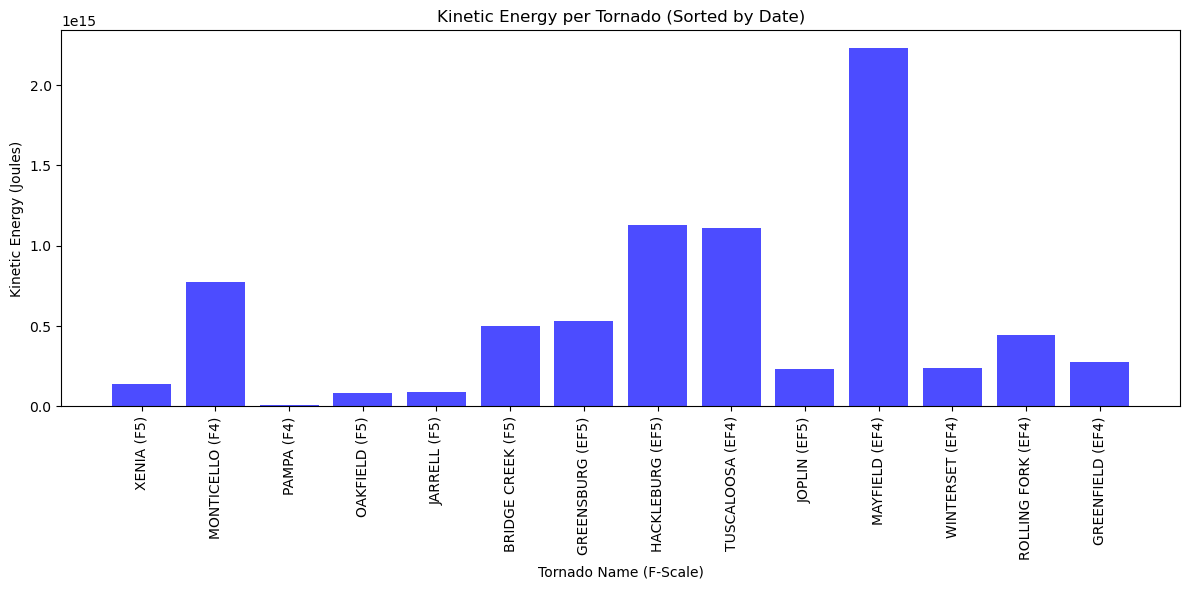

In [19]:
# Constants
density = 1  # kg/m^3 (air density)
average_height = 1000  # meters (average height of tornado)
mile_to_meter = 1609.34  # Conversion factor for miles to meters
yard_to_meter = 0.9144  # Conversion factor for yards to meters
mph_to_mps = 0.44704  # Conversion factor for mph to m/s

# Convert BEGIN_DATE to datetime format
data['BEGIN_DATE'] = pd.to_datetime(data['BEGIN_DATE'], errors='coerce')

# Function to calculate kinetic energy
def calculate_kinetic_energy(row):
    try:
        # Ensure the data needed for calculation exists
        if pd.notna(row['TOR_LENGTH']) and pd.notna(row['TOR_WIDTH']) and pd.notna(row['HIGHEST_SPEED']):
            # Convert units
            length_meters = row['TOR_LENGTH'] * mile_to_meter
            width_meters = row['TOR_WIDTH'] * yard_to_meter
            velocity_mps = row['HIGHEST_SPEED'] * mph_to_mps
            
            # Volume = length * width * height
            volume = length_meters * width_meters * average_height
            mass = density * volume  # mass = density * volume
            
            # Kinetic energy formula
            ke = 0.5 * mass * (velocity_mps ** 2)
            return ke
    except Exception as e:
        print(f"Error calculating KE for row: {row} -> {e}")
    return None

# Apply the function to calculate kinetic energy for each tornado
data['Kinetic_Energy'] = data.apply(calculate_kinetic_energy, axis=1)

# Sort the data by BEGIN_DATE in ascending order
data_sorted = data.sort_values(by='BEGIN_DATE')

# Combine `TOR_NAME` and `TOR_F_SCALE` for labeling
data_sorted['TOR_LABEL'] = data_sorted['TOR_NAME'] + " (" + data_sorted['TOR_F_SCALE'] + ")"

# Plot Kinetic Energy per Tornado with labels including `TOR_F_SCALE`
plt.figure(figsize=(12, 6))
plt.bar(data_sorted['TOR_LABEL'], data_sorted['Kinetic_Energy'], color='blue', alpha=0.7)
plt.xlabel('Tornado Name (F-Scale)')
plt.ylabel('Kinetic Energy (Joules)')
plt.title('Kinetic Energy per Tornado (Sorted by Date)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

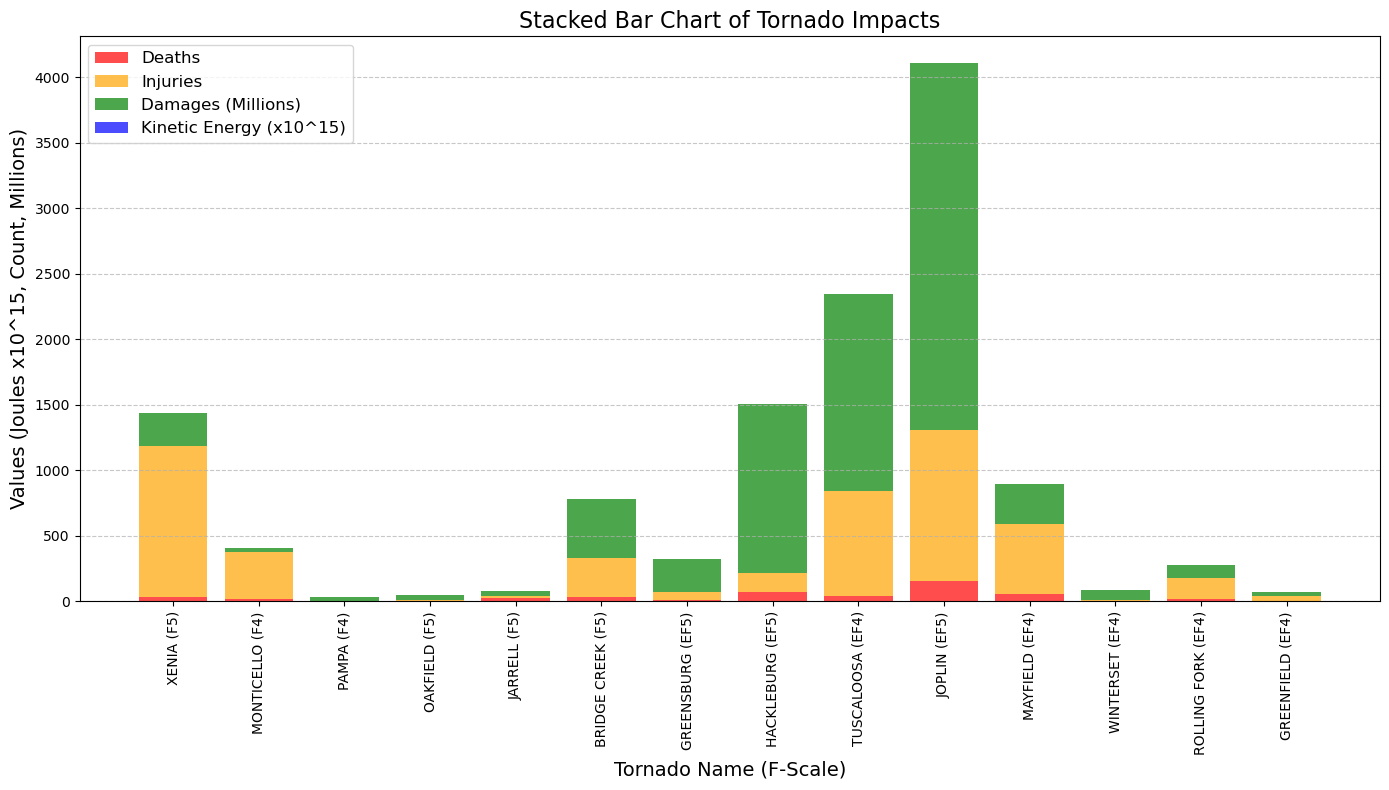

In [20]:
# Stacked Bar Plot for Kinetic Energy, Deaths, Injuries, and Damages
plt.figure(figsize=(14, 8))  # Increased figure size for clarity

# Normalize damages for better visualization (convert to millions)
data_sorted['DAMAGES_MILLIONS'] = data_sorted['DAMAGE_PROPERTY_NUM'] / 1e6

# Create the stacked bar chart
plt.bar(
    data_sorted['TOR_LABEL'], 
    data_sorted['DEATHS_DIRECT'], 
    color='red', 
    label='Deaths', 
    alpha=0.7
)
plt.bar(
    data_sorted['TOR_LABEL'], 
    data_sorted['INJURIES_DIRECT'], 
    bottom=data_sorted['DEATHS_DIRECT'], 
    color='orange', 
    label='Injuries', 
    alpha=0.7
)
plt.bar(
    data_sorted['TOR_LABEL'], 
    data_sorted['DAMAGES_MILLIONS'], 
    bottom=data_sorted['DEATHS_DIRECT'] + data_sorted['INJURIES_DIRECT'], 
    color='green', 
    label='Damages (Millions)', 
    alpha=0.7
)
plt.bar(
    data_sorted['TOR_LABEL'], 
    data_sorted['Kinetic_Energy'] / 1e15,  # Normalize KE for visualization
    bottom=data_sorted['DEATHS_DIRECT'] + data_sorted['INJURIES_DIRECT'] + data_sorted['DAMAGES_MILLIONS'], 
    color='blue', 
    label='Kinetic Energy (x10^15)', 
    alpha=0.7
)

# Customize the plot
plt.xlabel('Tornado Name (F-Scale)', fontsize=14)
plt.ylabel('Values (Joules x10^15, Count, Millions)', fontsize=14)
plt.title('Stacked Bar Chart of Tornado Impacts', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


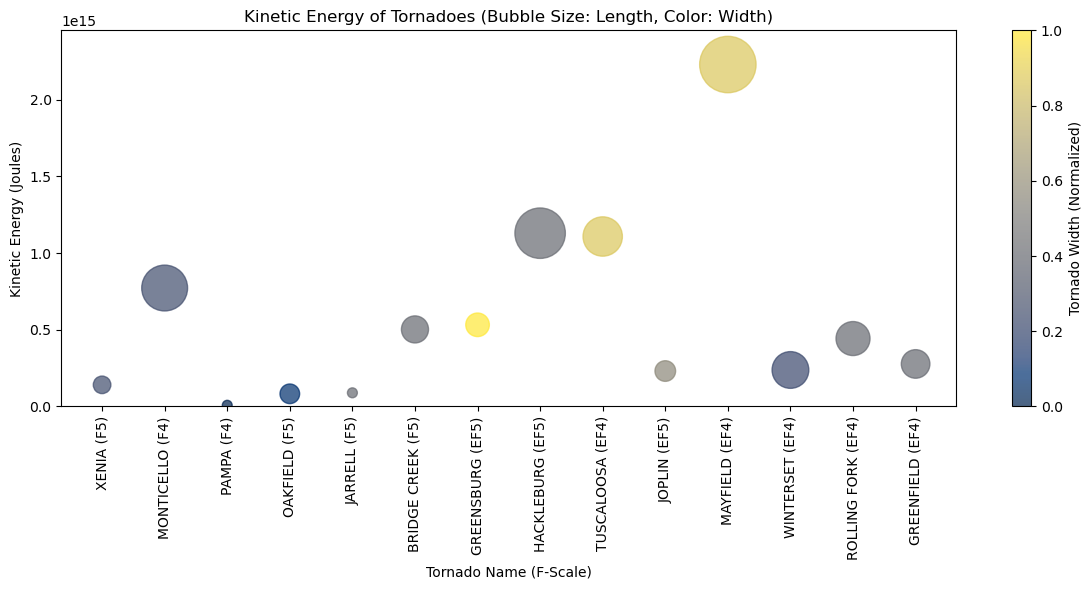

In [21]:
# Scatter Plot including Tornado Volume and Width as Marker Size and Color
plt.figure(figsize=(12, 6))

# Normalize Tornado Width for color intensity
normalized_width = (data_sorted['TOR_WIDTH'] - data_sorted['TOR_WIDTH'].min()) / (
    data_sorted['TOR_WIDTH'].max() - data_sorted['TOR_WIDTH'].min()
)

plt.scatter(
    data_sorted['TOR_LABEL'], 
    data_sorted['Kinetic_Energy'], 
    s=data_sorted['TOR_LENGTH'] * 10,  # Tornado Length for Marker Size
    c=normalized_width,  # Tornado Width for Marker Color
    cmap='cividis', 
    alpha=0.7
)

# Add color bar to indicate Tornado Width
cbar = plt.colorbar()
cbar.set_label('Tornado Width (Normalized)')

plt.xlabel('Tornado Name (F-Scale)')
plt.ylabel('Kinetic Energy (Joules)')
plt.title('Kinetic Energy of Tornadoes (Bubble Size: Length, Color: Width)')
plt.xticks(rotation=90)
plt.ylim(0, data_sorted['Kinetic_Energy'].max() * 1.1)  # Increase y-axis limit by 10%
plt.tight_layout()
plt.show()


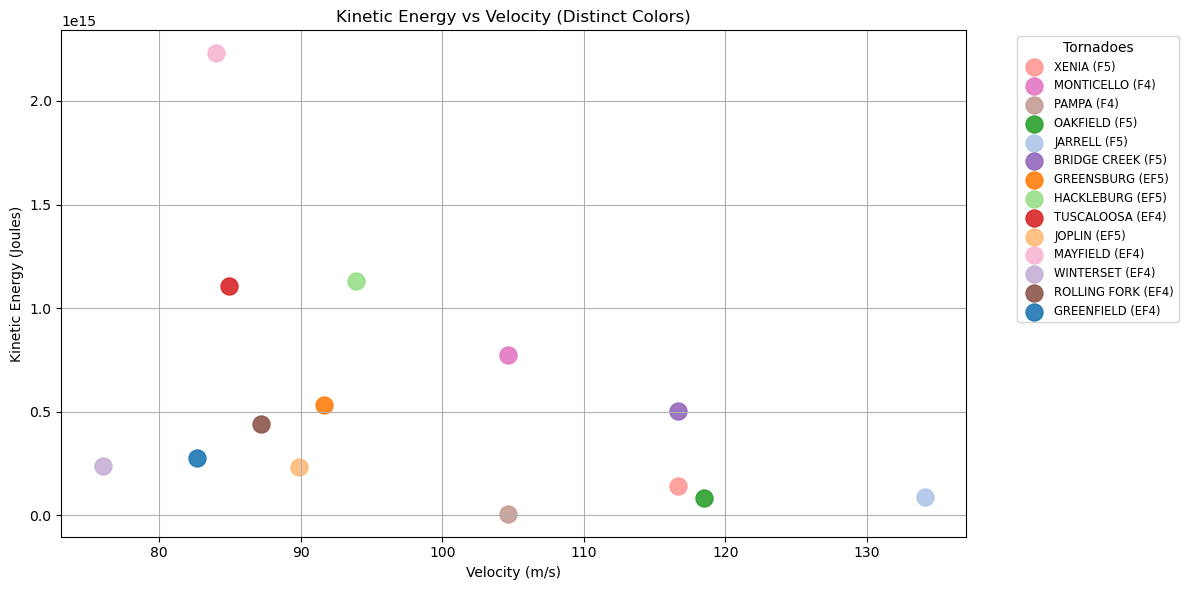

In [22]:
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

# Scatter plot for Kinetic Energy vs Velocity (HIGHEST_SPEED)
plt.figure(figsize=(12, 6))

# Convert HIGHEST_SPEED to m/s for consistency
data_sorted['Velocity_mps'] = data_sorted['HIGHEST_SPEED'] * mph_to_mps

# Use a custom colormap with highly distinct colors
distinct_colors = sns.color_palette("tab20", n_colors=len(data_sorted))

# Scatter plot
for i, row in data_sorted.iterrows():
    plt.scatter(
        row['Velocity_mps'], 
        row['Kinetic_Energy'], 
        color=distinct_colors[i % len(distinct_colors)],  # Assign distinct color
        label=row['TOR_LABEL'], 
        s=150,  # Larger marker size for emphasis
        alpha=0.9  # Higher opacity for boldness
    )

# Add labels and title
plt.xlabel('Velocity (m/s)')
plt.ylabel('Kinetic Energy (Joules)')
plt.title('Kinetic Energy vs Velocity (Distinct Colors)')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', title="Tornadoes")

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Earlier we found the averages for F/EF4s and F/EF5s in regards to impacts. We saw that F/EF5 tornadoes have a significant impact as compared to F/EF4 tornadoes in general. Lets now look at the averages for Kinetic Energy for violent tornadoes.

In [23]:
# Ensure the `TOR_F_SCALE` column is in a consistent format
data['TOR_F_SCALE'] = data['TOR_F_SCALE'].str.strip()

# Filter for EF4, EF5, F4, and F5 tornadoes
filtered_data = data[data['TOR_F_SCALE'].isin(['EF4', 'EF5', 'F4', 'F5'])]

# Combine all 4s (EF4 and F4) and all 5s (EF5 and F5)
filtered_data['Scale_Group'] = filtered_data['TOR_F_SCALE'].apply(lambda x: 'F/EF4' if x in ['EF4', 'F4'] else 'F/EF5')

# Group by the new `Scale_Group` and calculate the mean kinetic energy
mean_ke = filtered_data.groupby('Scale_Group')['Kinetic_Energy'].mean()

# Display the results
print("Mean Kinetic Energy for Tornadoes (F/EF4s and F/EF5s):")
print(mean_ke)



Mean Kinetic Energy for Tornadoes (F/EF4s and F/EF5s):
Scale_Group
F/EF4    7.251794e+14
F/EF5    3.869452e+14
Name: Kinetic_Energy, dtype: float64


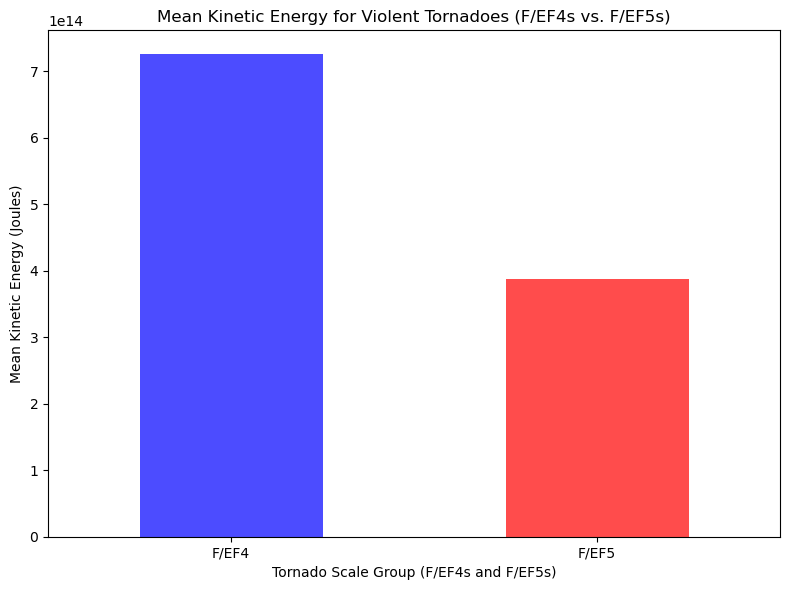

In [24]:
# Plot Mean Kinetic Energy
plt.figure(figsize=(8, 6))
mean_ke.plot(kind='bar', color=['blue', 'red'], alpha=0.7)

# Add labels and title
plt.xlabel('Tornado Scale Group (F/EF4s and F/EF5s)')
plt.ylabel('Mean Kinetic Energy (Joules)')
plt.title('Mean Kinetic Energy for Tornado Groups (F/EF4s vs. F/EF5s)')

# Improve layout
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In the above plot we can see that F/EF4 tornadoes in general (according to this small dataset) have quite a bit more Kinetic Energy as compared to F/EF5 tornadoes.

Lastly, 2 tornadoes within this dataset have DOW measured winds just above the surface, Greenfield EF4 from earlier this year and the highest ever measured winds with the 1999 Bridge Creek/Moore F5. Lets look at the Kinetic Energy for both with the measured DOW wind speeds. 

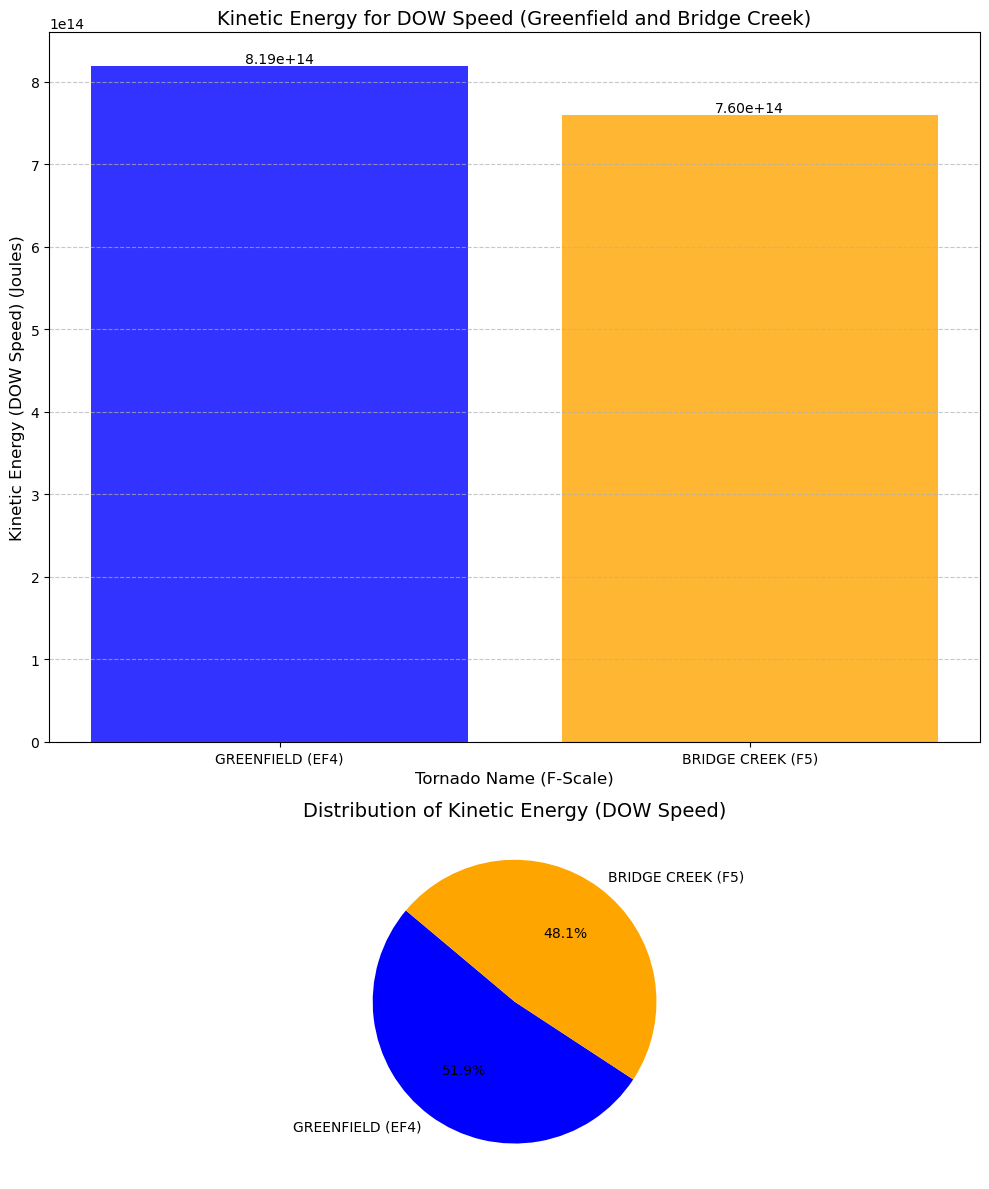

In [31]:
# Filter and prepare the tornado data
data['TOR_NAME'] = data['TOR_NAME'].str.strip()
selected_tornadoes = data.loc[data['TOR_NAME'].isin(['BRIDGE CREEK', 'GREENFIELD'])].copy()

# Convert `DOW_SPEED` to m/s
selected_tornadoes.loc[:, 'DOW_SPEED_MPS'] = selected_tornadoes['DOW_SPEED'] * mph_to_mps

# Function to calculate KE using `DOW_SPEED`
def calculate_ke_dow_speed(row):
    if pd.notna(row['TOR_LENGTH']) and pd.notna(row['TOR_WIDTH']) and pd.notna(row['DOW_SPEED_MPS']):
        # Convert length and width to meters
        length_meters = row['TOR_LENGTH'] * mile_to_meter
        width_meters = row['TOR_WIDTH'] * yard_to_meter
        # Calculate volume and mass
        volume = length_meters * width_meters * average_height
        mass = density * volume
        # Calculate kinetic energy
        ke = 0.5 * mass * (row['DOW_SPEED_MPS'] ** 2)
        return ke
    return None

# Apply the calculation
selected_tornadoes.loc[:, 'KE_DOW_SPEED'] = selected_tornadoes.apply(calculate_ke_dow_speed, axis=1)

# Combine `TOR_NAME` and `TOR_F_SCALE` for labeling
selected_tornadoes['TOR_LABEL'] = selected_tornadoes['TOR_NAME'] + " (" + selected_tornadoes['TOR_F_SCALE'] + ")"

import matplotlib.pyplot as plt

# Bar Chart and Pie Chart Combined
fig, ax = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [2, 1]})

# Bar Chart
bars = ax[0].bar(selected_tornadoes['TOR_LABEL'], selected_tornadoes['KE_DOW_SPEED'], color=['blue', 'orange'], alpha=0.8)

# Add bar values
for bar in bars:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2e}', ha='center', va='bottom', fontsize=10)

# Customize the bar chart
ax[0].set_xlabel('Tornado Name (F-Scale)', fontsize=12)
ax[0].set_ylabel('Kinetic Energy (DOW Speed) (Joules)', fontsize=12)
ax[0].set_title('Kinetic Energy for DOW Speed (Greenfield and Bridge Creek)', fontsize=14)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Pie Chart
pie_labels = selected_tornadoes['TOR_LABEL']
pie_values = selected_tornadoes['KE_DOW_SPEED']
ax[1].pie(
    pie_values,
    labels=pie_labels,
    autopct='%1.1f%%',
    colors=['blue', 'orange'],
    startangle=140,
    textprops={'fontsize': 10}
)
ax[1].set_title('Distribution of Kinetic Energy (DOW Speed)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()



Once again, an F/EF4 tornado has more Kinetic Energy than an F/EF5 tornado. We may also want to investigate the Kinetic Energy for strong tornadoes as well in the future. And of course much more research needs to be done to determine Kinetic Energy for violent tornadoes as well as we only used a small dataset for 14 violent tornadoes. 